# Synchrotron 2018

RF 2018

This Jupyter notebook is intended as the first chapter of a crash course in the basic theory and observables of astrophysical synchrotron emission, typically observed in the radio band, and specifically in the context of radio transients and variables. 

It allows you to extract the most basic, and yet often surprisingly fundamental, physics from the data. Once the basics are established, it then moves on to consider one of the simplest models for variable radio emission, that of van der Laan 1966. This model is still relevant today and the underlying equations are the same as those used in more sophisticated models (which will be dealt with in the next chapter).

You may want to read it through once first, and then go back and play with running the individual cells. Once you've understood what the cells are doing, feel free to hack them. If you do something which you consider useful and an improvement, please let me know.

#### First some constants and set up: you need to run the cell below

In [1]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
# the following is the magic command which makes all the plots appear inline in the notebook
%matplotlib inline
import numpy as np
import math
import scipy.constants
# these are in cgs
# speed of light :)
c=3.0e10
# relativistic sound speed of c/sqrt[3]
cs=c/(3.0**0.5)
# Boltzmann's constant
kb=1.38e-16

# we'll quite often want to infer physical size and/or volume from variability timescale
# as our sources are often not spatially resolved
# we usually do this by assuming some constant expansion speed (c is a maximum, cs is often chosen)
# at any time, if you have an alternative way of estimating r, V (e.g. resolved emission), set them directly

def sizefromt(t,exp):
    r=t*vexp
    V=(4.0/3.0)*np.pi*(r**3.0)
    return r,V

# solid angle for a source of size s and distance d (small angle approximation)
def solidangle(r,d):
    omega=np.pi * (r**2.0) / (d**2.0)
    return omega
    
# we'll often want to make lin and log plots side by side
# so I'll define a simple function here to do that
# make sure your x and y variables are called, well, x and y
# then the only input parameters are your x and y-axis labels

def dplot(xl,yl):
    plt.subplot(1,2,1)
    plt.plot(x,y,'r')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title('Linear')
    plt.subplot(1,2,2)
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x,y,'r')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title('Log')
    plt.show()

## Part 1: basic physics from simple observables

### Synchrotron and Cyclotron radiation

Nearly everything in this section is better 
explained, albeit at greater length, in 
*High Energy Astrophysics* by Longair, 
and I recommend everyone get a copy.

https://www.amazon.co.uk/High-Energy-Astrophysics-Malcolm-Longair/dp/0521756189

Synchrotron emission arises whenever 
relativistic electrons (or positrons) accelerate in a magnetic field (‘spiral around the field lines’) due to the $v \times B$ component of the Lorentz force. It is the relativistic version of cyclotron radiation. 

<hr />

An electron with a Lorentz factor $\gamma$ radiates a broad spectrum of synchrotron radiation, with a peak around

$$\nu_c = \gamma^2 \nu_g$$

where $v_g$ is the (non-relativistic) cyclotron frequency

$$\nu_g = \frac{qB}{2 \pi m}$$

i.e. synchrotron radiation can be considered to be inverse Compton scattering of cyclotron radiation (since for inverse Compton scattering $\nu_{\rm scattered} \sim \gamma^2 \nu_{\rm initial}$) 

Inserting constants, we can easily calculate $\nu_c$ for a given $\gamma$ and $B$

$$\nu_c = 2.8 \times 10^6 \gamma^2 B$$ Hz

where in this formula $B$ is in Gauss.

Reversing this, if we observe synchrotron radiation at some frequency, and can estimate $B$, we can estimate the Lorentz factor of the radiating electrons

$$\gamma = \sqrt{\frac{\nu_c}{2.8 \times 10^6 B}}$$

The following code snippet is simple $\gamma$-estimator you can use.

In [2]:
### USER INPUT VARIABLES HERE ###
# set your observing frequency in GHz
nu=15.0
# convert to Hz
nuc=nu*1e9
# set your estimate of B in Gauss. How would you estimate this you ask? 
# soon you will see that the equipartition assumption gives you one route
# evidence for or against synchrotron losses also helps to constrain it
B=0.3
#################################

# this is the formula for gamma from nuc and B given above
gamma=(nuc/(B*2.9e6))**0.5

# observing frequency i
# equivalent energy in keV
energy=511.0 * (gamma)
energyerg=energy*1.6e-9
# NB this 511.0 * 1.6e-9 = 8.2e-7 is the electron-gamma-to-erg conversion factor used later on

print 'Emission at ',('%.2e' % nu),(' GHz, in a magnetic field of '),('%.2e' % B),(' Gauss:')
print 'Lorentz factor of emitting electrons',('%.2e' % gamma)
print 'Equivalent energy of electrons is',('%.2e' % energy),' keV = ',('%.2e' % energyerg),' erg'

Emission at  1.50e+01  GHz, in a magnetic field of  3.00e-01  Gauss:
Lorentz factor of emitting electrons 1.31e+02
Equivalent energy of electrons is 6.71e+04  keV =  1.07e-04  erg


Emission observed at 1.50e+01  GHz, relation between B and gamma of emitting electrons:


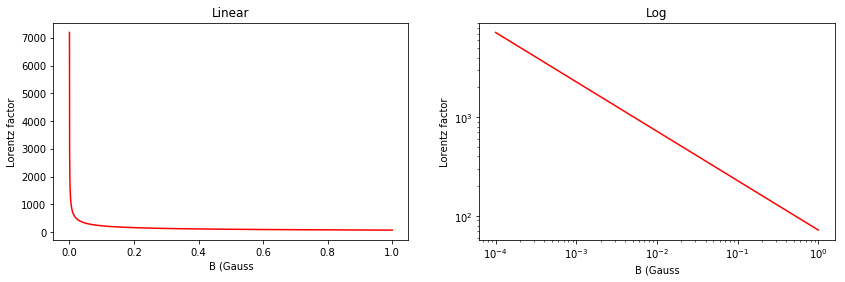

In [3]:
### USER INPUT VARIABLES HERE ###
# We can also plot the relation between gamma and B
# input here your likely lower and upper limits to B, we'll make linear and log plots
b1=1.0e-4
b2=1.0
#################################

x=np.linspace(b1,b2,10000)
y=(nuc/(x*2.9e6))**0.5
  
print ("Emission observed at"), ('%.2e' % (nuc/1.0e9)),(' GHz, relation between B and gamma of emitting electrons:')   
plt.figure(figsize=(14,4))
dplot("B (Gauss","Lorentz factor")

## Brightness temperature calculators

The brightness temperature associated with any emitting region is the temperature a black body of the same size would require in order to produce the same flux at that frequency. It can be a good constraint on the emission
physics at play. Synchrotron emission has a theoretical maximum brightness temperature of $\sim 10^{12}$K - if you measure something significantly above this it is either Doppler boosted or you've made some wrong assumptions or other errors in your calculation. **Or** it is something with an intrinsic brightness temperature $\gg 10^{12}$K, which requires coherent emission such as that seen from pulsars or masers.

### B1 Brightness temperature from integrated flux and angular size

Using the Rayleigh-Jeans tail of the Planck black-body function we get:

$$T_B = \frac{S_{\nu} c^2}{2 k_B \Omega \nu^2} = \frac{S_{\nu} c^2 D^2}{2 \pi k_B \nu^2 R^2}$$

The relation between physical size, distance and solid angle for a (circular) object, is given by:

$$\Omega = \frac{\pi R^2}{D^2}$$

In [4]:
### USER INPUT VARIABLES HERE ###
# flux density in mJy
s=9.0
# observing frequency in GHz
nu=8.6
# angular sizes (two axes) in arcseconds
a1=0.04
a2=0.04
#####################

# convert flux density to proper units
s=s*1e-26
# convert frequency to proper units
nuc = nu * 1e9

# here I convert to angular sizes to degrees, multiply to get square degrees, convert to steradians
# 1sr = 3282.8 deg^2
a1=a1/3600.0
a2=a2/3600.0
aa=a1*a2
# add in here a geometrical factor, otherwise you just get a rectangle on the sky
# pi/4 is the appropriate factor for an ellipse
aa=aa*(np.pi / 4.0)

omega=(aa)/3282.8

def brightnesstemp (s,omega,nuc):
    tb=(s * c**2) / (2 * kb * omega * nuc**2)
    return tb
 
tb=brightnesstemp(s,omega,nuc)
    
print 'Brightness temperature for resolved radio source'
print '(or lower limit for unresolved source)'
print ('T_B ='),('%.2e' % tb),('K')

Brightness temperature for resolved radio source
(or lower limit for unresolved source)
T_B = 1.34e+05 K


### B2 Brightness temperature inferred from variability timescale

We can also constrain the size of the emitting region from the variability timescale, estimating R from $\Delta t$, if we have some distance estimate for our source, using the expression for solid angle.

In [5]:
### USER INPUT VARIABLES HERE ###
# S in mJy
s=2.0
# D in kpc
d=8.0
# observing frequency in GHz
nu=8.6
# variability timescale in seconds
t=3600.0
# expansion speed (usually c or cs)
vexp=c
#####################

nuc=nu*1e9
s=s*1e-26
d=d*3.1e21
(r,V)=sizefromt(t,vexp)

omega=solidangle(r,d)

tb=brightnesstemp(s,omega,nuc)

print 'Lower limit on brightness temperature from variability'
print ('T_B >'),('%.2e' % tb),('K')


Lower limit on brightness temperature from variability
T_B > 1.48e+07 K


## Minimum Energy

Burbidge showed back in the 1950s that via a very simple argument you can demonstrate that a synchrotron-emitting plasma contains a lot of energy. You can already sense this from the fact that you have GHz-frequency radio emission (i.e. low-frequency photons) coming from (as we showed earlier) very highly relativistic electrons. 

For a given synchrotron emitting volume, the total energy in the relativistic electrons
$E_e \propto B^{−3/2}$ and that stored in the magnetic field $E_B \propto B^2$.


While there could be other contributors to the total energy of some synchrotron emitting blob (perhaps component of bulk motion, some population of non radiating particles) the minimum requirements are simply the two components above.  There are many caveats to this approach – please read discussion in Longair. In particular the emitting volume may be only some fraction of the total volume of the astrophysical source (i.e. need to consider a ‘filling factor’)

We can therefore see that there is going to be a minimum in the total energy as a function of B. This magnetic field is often called the equipartition field because the minimum energy condition occurs when the total energies in particles and magnetic field are very similar,

$$E_{B} = \frac34 E_e$$

It is very important to stress that this is *not* the minimum magnetic field, it is the magnetic field corresponding to minimum energy.

***

### E1: a simple estimation of minimum energy and equipartition field

A simplified formula, from Longair, corresponding specifically to the case of spectral index $\alpha = -0.75$ (a bit steep, but not unreasonable), gives

$$E_{\rm min, SI} \sim 3 \times 10^6 \eta^{4/7} V^{3/7} \nu^{2/7} L^{4/7}$$

J, where $V$ is in m$^3$, $L_{\nu}$ is in W Hz$^{-1}$ and $\nu$ is in Hz

where $V$ is the volume of the emitting region in m$^3$, $\nu$ is the observed frequency in Hz, $L$ is the specific luminosity in W Hz$^{-1}$.

Note $\eta = 1 + \beta$ (dimensionless) parametrizes the energy in protons: the ratio of energy in protons to that in electrons is given by $\epsilon_{\rm p} = \beta \epsilon_{e}$.  Ignoring the protons entirely (usually the default position for synchrotron sources) therefore means $\eta=1$.

The magnetic field corresponding to this minimum energy is given by

$$ B_{\rm min E, SI} = 1.8 \left( \frac{\eta L_{\nu}}{V} \right)^{2/7} \nu^{1/7} $$

Tesla.

We can convert this to the cgs unit system we are using:

$$E_{\rm min, cgs} \sim 8 \times 10^6 \eta^{4/7} V^{3/7} \nu^{2/7} L^{4/7}$$

erg, where $V$ is in cm$^3$, $L_{\nu}$ is in erg s$^{-1}$ Hz$^{-1}$ and $\nu$ remains in Hz (note that the constant hardly changes as the factors accomodating the larger values of volume and luminosity in cgs are almost exactly offset by the switch from J to erg).

In cgs units the equipartition field is given by

$$ B_{\rm min E, cgs} = 9 \times 10^3 \left( \frac{\eta L_{\nu}}{V} \right)^{2/7} \nu^{1/7} $$

Gauss.




Physical size and volume from timescale and expansion at speed 3.00e+10 cm/sec
t= 1.80e+03 sec, r= 5.40e+13 cm, V = 6.60e+41 cm^3
Calculated specific luminosity
L = 7.31e+21  erg / sec / Hz
Minimum Energy
E ~ 1.50e+40 erg
The corresponding magnetic field is
B ~ 4.80e-01 Gauss
And so the total energy in magnetic fields is
6.05e+39  erg
Lorentz factor of emitting electrons for this field is
8.48e+01


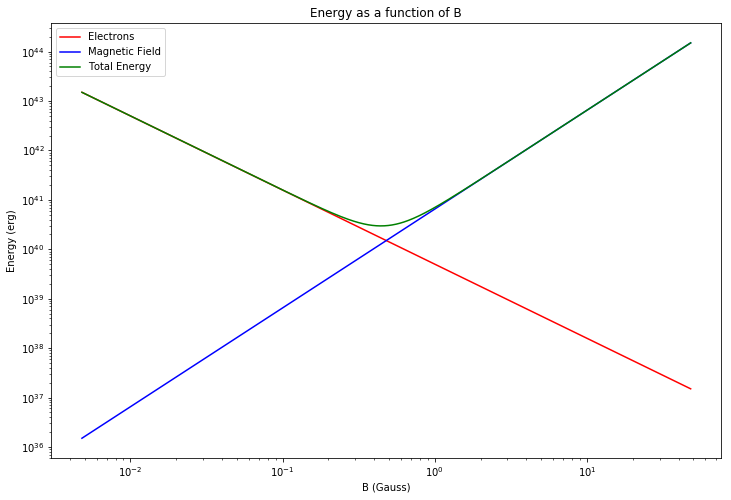

In [14]:
### USER INPUT VARIABLES HERE ###
eta = 1.0
# Emitting volume in cubic centimetres: you set this directly e.g.
# V=1e36
# or you can calculate it for some assumed geometry and variability timescale
# e.g. t sec variability, assuming expansion at relativistic sound speed of c/sqrt[3]
t=1800.0
vexp=c
# Observing frequency in GHz
nu=10
nuc=nu*1e9

# specific luminosity, you can define directly:
# L=1.0e30
# in which case comment out all of the next lines to 'E='

# or you can calculate from observed flux density and distance
# flux density in mJy
s = 50.0
# Distance in kpc
D = 11.00
#####################

(r,V)=sizefromt(t,vexp)

print ('Physical size and volume from timescale and expansion at speed'),('%.2e' % vexp),('cm/sec')
print ('t='),('%.2e' % t),('sec, r='),('%.2e' % r),('cm, V ='),('%.2e' % V),('cm^3')

def Lum(s,D):
    L = (s * 1e-26) * 4 * np.pi * (D * 3.1e21)**2
    print 'Calculated specific luminosity'
    print ('L ='),('%.2e' % L),(' erg / sec / Hz')
    return L

L=Lum(s,D)

def MinE(eta,V,nuc,L):
    E=(8.0e6) * (eta**(4.0/7.0)) * (V**(3.0/7.0)) * (nuc ** (2.0/7.0)) * (L ** (4.0/7.0))

    print 'Minimum Energy'
    print ('E ~'),('%.2e' % E),('erg')

# Now we will calculate the corresponding B field

    Beq=(9.0e3) * ((eta*L)/V)**(2.0/7.0) * nuc**(1.0/7.0)

    print 'The corresponding magnetic field is'
    print ('B ~'),('%.2e' % Beq),('Gauss')
    print 'And so the total energy in magnetic fields is'
    Eb=(V*(Beq**2.0))/(8*np.pi)
    print ('%.2e' % Eb),(' erg')
    geq=(nuc/(Beq*2.9e6))**0.5
    print 'Lorentz factor of emitting electrons for this field is'
    print ('%.2e' % geq)
    return E,Beq,geq

(E,Beq,geq)=MinE(eta,V,nuc,L)

# We can finish this by plotting how the Energy 
# will vary around this minimum with varying B

x=np.linspace(Beq/100,Beq*100,10000)

Ee=E*(x/Beq)**(-1.5)
Eb=E*(x/Beq)**(2.0)
Etot=Ee+Eb

plt.figure(figsize=(12,8))
plt.yscale('log')
plt.xscale('log')
plt.plot(x,Ee,'r',label="Electrons")
plt.plot(x,Eb,'b',label="Magnetic Field")
plt.plot(x,Etot,'g', label="Total Energy")
plt.xlabel('B (Gauss)')
plt.ylabel('Energy (erg)')
plt.title('Energy as a function of B')
plt.legend()
# comment / uncomment the next line in order to output image to a file
plt.savefig("Min_E.png")
###
plt.show()
plt.close()

***
***
***
***

## Part 2: Synchrotron emission from a power-law distribution of electrons

We now move on to the most commonly-observed situation for astrophysical synchrotron emission, namely that the emission arises from a broad distribution of relativistic electrons which can be represented by a power law. 

$$N(E) dE = N_0 E^{-p} dE$$

between some limits $E_1,E_2$, where N(E) is a number density (*not* a total number). There is good theoretical and observational evidence that such distributions are often a good description of the underlying particle distribution. 

The figure below illustrates the typical synchrotron spectrum from a single source with such a power-law distribution of electrons. We will learn how to calculate these regions shortly, but first familiarise yourself with the spectrum, noting

1. The self-absorbed part of the spectrum has a spectral index +2.5, not the +2.0 associated with thermal emission (in simple terms, this is because the emission observed does not come from electrons at a single temperature, but rather from a population whose effective temperature varies as $T_{\rm eff} \propto \nu^{1/2}$)

2. In the optically thin branches, the spectral index is directly related to the power-law index of the underlying electron distribution. Radiation cooling is not often seen in most sources, which means usually when optically thin sychrotron emission is observed you can directly calculate $p=1-2\alpha$ for the definition of spectral index as 

$$\alpha = \frac{\log \left( \frac{S_{\nu_1}}{S_{\nu_2}} \right)}{\log \left( \frac{\nu_1}{\nu_2} \right)}$$

i.e. $S_{\nu} \propto \nu^{\alpha}$

(unfortunately it is necessary to check this in pretty much each and every paper you read as the reverse definition,  $S_{\nu} \propto \nu^{-\alpha}$ is also in widespread usage including, notably, Longair's *High Energy Astrophysics*)

<img src='ss.png'>

In order to go further, we need to consider the optical depth, emission and absorption coefficients associated with a synchrotron source. We follow the approach of Pacholcyzk (1970), *Radio Astrophysics*, which requires us to define some constants (using his notation, and in cgs units)

$c_1 = \frac{3 e}{4 \pi m^3 c^5} = 6.27 \times 10^{18}$

$c_5 = (2.26, 1.37, 0.97) \times 10^{-23}$ for $p=(1.5,2.0,2.5)$

$c_6 = (9.69, 8.61, 8.10) \times 10^{-41}$ for $p=(1.5,2.0,2.5)$

The frequency at which the optical depth $\tau = 1$ is given by

$$\nu_1 = 2 c_1 (s c_6)^{\frac{2}{p+4}} N_0^{\frac{2}{p+4}} B^{\frac{p+2}{p+4}}$$

Hz. I have made the (common) approximation that $B sin \theta \sim B$. The variable s is the thickness (depth) of the source along the line of sight, assumed to be constant for the source (although it can, and will, vary with time for a variable source, as we shall see later).


This frequency $\nu_1$, is close to the peak of the spectrum as it transitions from optically thick to thin.  It is not exactly at the peak, however, which occurs at 

$$\nu_m = \frac{\nu_1}{\tau_m^{\frac{2}{p+4}}}$$

and the optical depth at peak, $\tau_m = 0.35$ for $p=2$, which in turn leads to $\nu_m = 1.4 \nu_1$.

The **emission** and **absorption** coefficients for synchrotron radiation are, as a function of frequency $\nu$,

$$\epsilon_{\nu} = c_5 N_0 B^{\frac{p+1}{2}} \left( \frac{\nu}{2c_1} \right)^{\frac{1-p}{2}}$$

$$\kappa_{\nu} = c_6 N_0 B^{\frac{p+2}{2}} \left( \frac{\nu}{2c_1} \right)^{\frac{-(p+4)}{2}}$$

and therefore the **source function** is 

$$S_{\nu} = \frac{\epsilon_{\nu}}{\kappa_{\nu}} = \frac{c_5}{c_6} B^{-\frac12}  \left( \frac{\nu}{2c_1} \right)^{\frac52}$$

(we will try not to confuse this with the same symbol for flux density!)

The specific intensity observed from a region of physical depth $s$ is:

$$I_{\nu} = S_{\nu} (1 - e^{-\tau})$$

where the optical depth $\tau = \kappa s$.

In the optically thin limit, $\tau \ll 1$, $I_{\nu} = \epsilon_{\nu} s$ (via Taylor expansion), and so $I_{\nu} \propto \nu^{\frac{1-p}{2}}$ as we saw earlier for the optically thin branch in the absence of synchrotron (or inverse Compton) losses. **Measuring the spectral index in the optically thin branch, in the absence of significant radiation losses directly measures p**.

In the optically thick limit, $\tau \gg 1$, $I_{\nu} = S_{\nu}$, and so $I_{\nu} \propto \nu^{\frac52}$, i.e. the spectral index of the self-absorbed part is independent of $p$ and is steeper than thermal, self-absorbed, emission (again, as we saw earlier).  **Measuring the spectral index in the optically thick branch tells you nothing directly**.

We can now move towards calculating the entire synchrotron spectrum for a given set of parameters.

The specific intensity at a frequency $\nu$ can be given by:

$$I_{\nu} = S(\nu_1) J \left( \frac{\nu}{\nu_1}, p \right)$$

where $S(\nu_1)$ is the source function calculated at frequency $\nu_1$:

$$S(\nu_1)= \frac{c_5}{c_6} B^{-\frac12} \left( \frac{\nu_1}{2 c_1} \right)^{5/2}$$

where the defintion of $\nu_1$ has already been given above, and 

$$J(z,p) = z^{\frac52} \left[ 1- \exp(-z^{-\frac{p+4}{2}}) \right]$$

With this calculation done, the observed flux density is simply given by

$$F_{\nu} = \Omega I_{\nu} = \frac{\pi R^2}{D^2} I_{\nu}$$

where $\Omega$ is the source solid angle.

Chevalier (1998) (http://adsabs.harvard.edu/abs/1998ApJ...499..810C) 
takes this formulation verbatim from Pacholczyk, applied to a slab (flattened cylinder) geometry where $s$ is the depth (along the line of sight) and the projected surface area is $\pi R^2$. He specifically equates the volume of this region with the effective emitting volume $\frac43 \pi R^3 f = \pi R^2 s$ where $f$ is the volume emission filling factor. 

The sketch below illustrates this simple geometry

<img src='slab.png'>

The flux densities in the optically thick and thin limits are the given by:

$$F_{\nu, thick} = \frac{\pi R^2}{D^2} \frac{c_5}{c_6} B^{-\frac12} \left( \frac{\nu}{2 c_1} \right)^{\frac52}$$

$$F_{\nu, thin} = \frac{4 \pi R^3}{3 D^2} c_5 N_0 B^{\frac{p+1}{2}} \left( \frac{\nu}{2c_1} \right)^{\frac{1-p}{2}}$$

As expected, the optically thick flux depends only on the surface emission, whereas in the optically thin limit flux from the entire volume is observed.

We are now in the position to calculate and plot the spectrum of synchrotron emission from a power-law distribution of electrons, based on the equations above. It is good to stop and do this before we move on to the evolving spectrum associated with an expanding blob.

### S1: constants and functions

First it becomes useful to define some functions which allow us to calculate the spectrum. This cell needs to be run before all of the synchrotron spectrum calculations

In [7]:
# Define Pacholcyzk's constants
c1=6.27e18
# Here we choose the values for c5 and c6 which correspond to p=2.0
# You can set other values (see text above)
c5=1.37e-23
c6=8.61e-41
p=2.0
# p=2.0 is the standard value expected for non-relativistic shocks
# observationally, from the spectral indices of optically thin radio
# emission which are observed, 2.0 < p < 2.3.

# calculate nu1, frequency at which optical depth tau = 1
def nutau1 (r,p,N0,B):
    nu1= 2 * c1 * (r * c6)**(2/(p+4)) * N0**(2/(p+4)) * B**((p+2)/(p+4))
    return nu1

# Source function at nu1
def SFtau1 (B,nu1):
    SF=(c5 / c6 ) * B**(-0.5) * (nu1 / (2 * c1))**(2.5)
    return SF

# The following function will return the flux density as a function
# of frequency, peak frequency, source function and source angular size, in mJy
def F(freq,nu1,SF,omega):
    z=freq/nu1
    j=z**2.5 * (1 - np.exp(-z**(-(p+4)/2)))
    I=SF*j
    flux=I*omega*1.0e26
    return flux

Using those functions we can easily determine the full synchrotron spectrum once the user has input the blob parameters (I am ignoring here the factor which scales between $r$ and $s$ in the Chevalier model, since it is of order unity and we rarely, if ever, know the precise geometry to that kind of precision).

10916796389.3


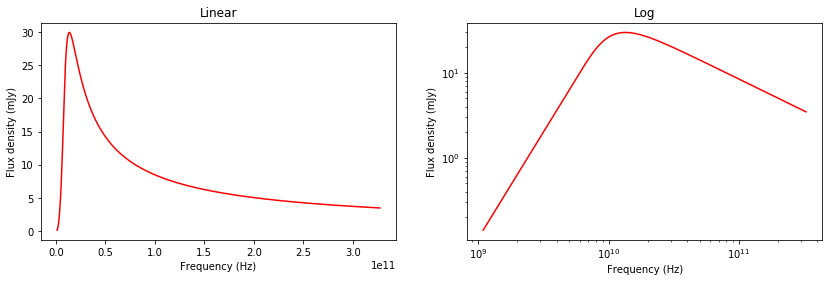

In [8]:
### USER INPUT VARIABLES HERE ###
# magnetic field in Gauss
B=1.9
# solid angle of source from size and distance of source
# distance in kpc then convert to cm
d=3.0
d=d*(3.1e21)
# size of blob here
# for an X-ray binary this might be something like 15 light minutes (3e13cm) across 
(r,V)=sizefromt(1800.0,cs)

# THIS IS NOT AN OFFICIAL LINE!
r=r*0.07

omega=solidangle(r,d)
# number density of emitting electrons
# I chose a value here which is more or less fits flux density seen for an X-ray binary
# at 8 kpc; we will see later how to estimate this
N0=0.0045
p=2.5
#############################


nu1=nutau1(r,p,N0,B)

print (nu1)

SF=SFtau1(B,nu1)

x=np.linspace(nu1/10.0,nu1*30.0,10000)
y=F(x,nu1,SF,omega)
plt.figure(figsize=(14,4))
dplot("Frequency (Hz)","Flux density (mJy)")

# try playing around with this a bit to get reasonable-looking
# flux densities at reasonable frequencies for your favourite source

## Time evolution of synchotron emission

Now, we can begin to explore how this spectrum might change as the source we have just defined, expands.

One of the earliest models which explored such evolution was that of van der Laan (1966) 

http://adsabs.harvard.edu/abs/1966Natur.211.1131V

(beware though, there are typos!)

This model considered an synchrotron-emitting 'blob' (also known as a 'plasmon' in some circles) which was expanding. As a result of the expansion, and consequent adiabatic expansion losses, the number density of emitting electrons varies as $N_0 \propto R^{-(2+p)}$. The magnetic field is assumed to evolve according to magnetic flux conservation $B \propto R^{-2}$. 

We can now take the spectrum we previously calculated, and see how it would have looked when the source was a factor of 2 smaller, and a factor of two larger (for linear expansion with time, this would correspond to $t=1,2,4$):

(NB the previous code cell needs to have been run before this one)

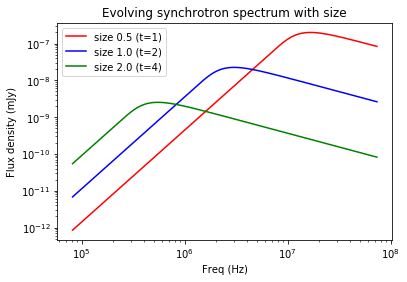

In [9]:
nu1=nutau1(s,p,N0,B)
SF=SFtau1(B,nu1)

x=np.linspace(nu1/30.0,nu1*30.0,100000)

# need to create functions for spectrum for source half and double size (assume p constant)
# here for double
sb=s*2.0
N0b=N0*(2.0**(-(2+p)))
Bb=B*(2.0**(-2.0))

nu1b=nutau1(sb,p,N0b,Bb)
SFb=SFtau1(Bb,nu1b)

# here for half
sc=s*0.5
N0c=N0*(0.5**(-(2+p)))
Bc=B*(0.5**(-2.0))

nu1c=nutau1(sc,p,N0c,Bc)
SFc=SFtau1(Bc,nu1c)

y=F(x,nu1,SF,omega)
yb=F(x,nu1b,SFb,omega*4.0)
yc=F(x,nu1c,SFc,omega/4.0)

plt.yscale('log')
plt.xscale('log')
plt.plot(x,yc,'r',label="size 0.5 (t=1)")
plt.plot(x,y,'b',label="size 1.0 (t=2)")
plt.plot(x,yb,'g', label="size 2.0 (t=4)")
plt.xlabel('Freq (Hz)')
plt.ylabel('Flux density (mJy)')
plt.title('Evolving synchrotron spectrum with size')
plt.legend()
# comment / uncomment the next line in order to output image to a file
plt.savefig("Synch3panes.png")
###
plt.show()
plt.close()

What is apparent, then, is that as our synchrotron-emitting source expands, the flux on the optically thin branch (above the peak) drops and the flux on the optically thick branch (below the peak) rises. This is a consequence of the peak of spectrum (where, recall, $\tau = 0.35$) moving to lower frequencies as the magnetic field and number density, and hence opacity, decrease.

A large range of models for transient radio emission can be produced by simply playing with how the radius varies with time, and the number density and magnetic field vary with the radius.

Let's implement a complete van der Laan model next.

### An implementation of van der Laan's expanding blob

#### Radio light curves as a function of frequency

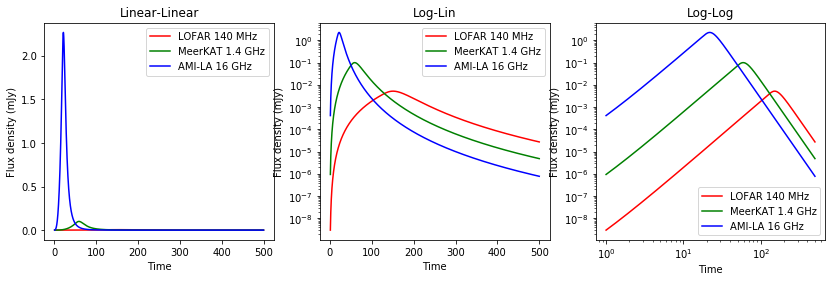

In [10]:
# In this code cell we will calculate how the flux at a given frequency evolves with time
# as some synchrotron-emitting blob expands

# Let us first decide how the size of the blob will vary with time
# The easiest to assume a constant expansion speed from some initial finite size
# Perhaps the blob is launched at 100000 Schwarzschild radii from a 10 solar mass black hole
r0 = (10*3.0e6)*100.0
# expansion speed perhaps c/sqrt[3]
v=cs
# distance in kpc
d=8.0
d=d*3.1e21
# chosen three frequencies in Hz to plot light curves at
n1=1.4e8
n2=1.4e9
n3=16.0e9
# e.g. LOFAR, MeerKAT, AMI-LA working together...

# initial magnetic field
B0=1.0e3
# initial number density
N00=1.0e12

# here is a very simple function for radius, but you can make it as complicated as you like
def radius(t):   
# this is a power-law expansion. Lineat expansion (e.g. vdL) gives a=1.0   
    a=1.0
    r=r0+(v*(t**a))
    return r
    
# similarly here is a very simple prescription for how B varies with radius
# we set a simple parameter b for power-law evolution
# in van der Laan it varies as R^{-2}, i.e. b=-2.0
# b=-1.0 is also plausible (see Chevalier 1998) and will slow the evolution c.f. vdL
def Br(r):
    b=-2.0
    B=B0*((r/r0)**b)
    return B

# ... and how N0 varies (van der Laan is R^{-(2+p)})
def N0r(r):
    N0=N00*((r/r0)**(-(2+p)))
    return N0

t=np.linspace(1.0,500.0,10000)
rr=radius(t)
omega=np.pi * (rr**2.0) / (d**2.0)
br=Br(rr)
nr=N0r(rr)
nu1r=nutau1(rr,p,nr,br)
sfr=SFtau1(br,nu1r)
y1=F(n1,nu1r,sfr,omega)
y2=F(n2,nu1r,sfr,omega)
y3=F(n3,nu1r,sfr,omega)

# easy to calculate the light curves with these functions
# takes more lines to plot it nicely, in three different formats

l1="LOFAR 140 MHz"
l2="MeerKAT 1.4 GHz"
l3="AMI-LA 16 GHz"

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(t,y1,'r', label=l1)
plt.plot(t,y2,'g', label=l2)
plt.plot(t,y3,'b', label=l3)
plt.xlabel("Time")
plt.ylabel("Flux density (mJy)")
plt.title('Linear-Linear')
plt.legend()
plt.subplot(1,3,2)
plt.yscale('log')
plt.plot(t,y1,'r', label=l1)
plt.plot(t,y2,'g', label=l2)
plt.plot(t,y3,'b', label=l3)
plt.xlabel("Time")
plt.ylabel("Flux density (mJy)")
plt.title('Log-Lin')
plt.legend()
plt.subplot(1,3,3)
plt.xscale('log')
plt.yscale('log')
plt.plot(t,y1,'r', label=l1)
plt.plot(t,y2,'g', label=l2)
plt.plot(t,y3,'b', label=l3)
plt.xlabel("Time")
plt.ylabel("Flux density (mJy)")
plt.title('Log-Log')
plt.legend()
plt.savefig("lightcurves.png")
plt.show()


It is clear from the log-log plot that the both the rise and decay phases have a power-law behaviour with time. This can be explicitly calculated by putting the van der Laan dependencies into the equations above, for linear expansion. In this case we get $F_{\nu} \propto t^3$ for the rising (optically thick) phase (once $R(t) >> R_0$) and $F_{\nu} \propto t^{-2p}$ in the decay (optically thin) phase (and recall we usually default to $p=4$ so $\rightarrow F_{\nu} \propto t^{-4}$).

More general solutions can be derived. If radius, magnetic field and number density evolve as

$$R(t) \propto t^a$$

$$B(t) \propto R(t)^b \propto t^{ab}$$

$$N_0(t) \propto R(t)^c \propto t^{ac}$$

then 

$$F_{thick} \propto t^u$$ where $$u={a\left( 2- \frac{b}{2} \right)}$$

and

$$F_{thin} \propto t^v$$ where $$v={a \left(3+c+b\frac{[p+1]}{2} \right)}$$

Check that inserting the van der Laan conditions of $a=1$, $b=-2$ and $c=-(2+p)$ recovers the correct evolution.

Note the very strong dependence of peak flux on frequency. This is *not* observed in many events which otherwise show 'van der Laan-like' evolution from optically thick to optically thin.

*This completes the first chapter of the crash course in radio transients. Part two will include more physical interpretation of data, consideration of the effects of special relativity and models for supernovae and gamma-ray bursts.*